In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data.head(3)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


In [ ]:
test_path = "/content/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head(3)

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...


In [ ]:
test_soln_path = "/content/test_data_solution.txt"
test_soln_data = pd.read_csv(test_soln_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_soln_data.drop(test_soln_data.columns[[0, 2]], axis=1, inplace=True)
test_soln_data.rename(columns = {'Title':'Actual Genre'}, inplace = True)
test_soln_data.head(3)

,Actual Genre
1,thriller
2,comedy
3,documentary


In [ ]:
train_data.Genre.value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

<ipython-input-9-e3967934d931>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')


Text(0, 0.5, 'Distribution of Genres')

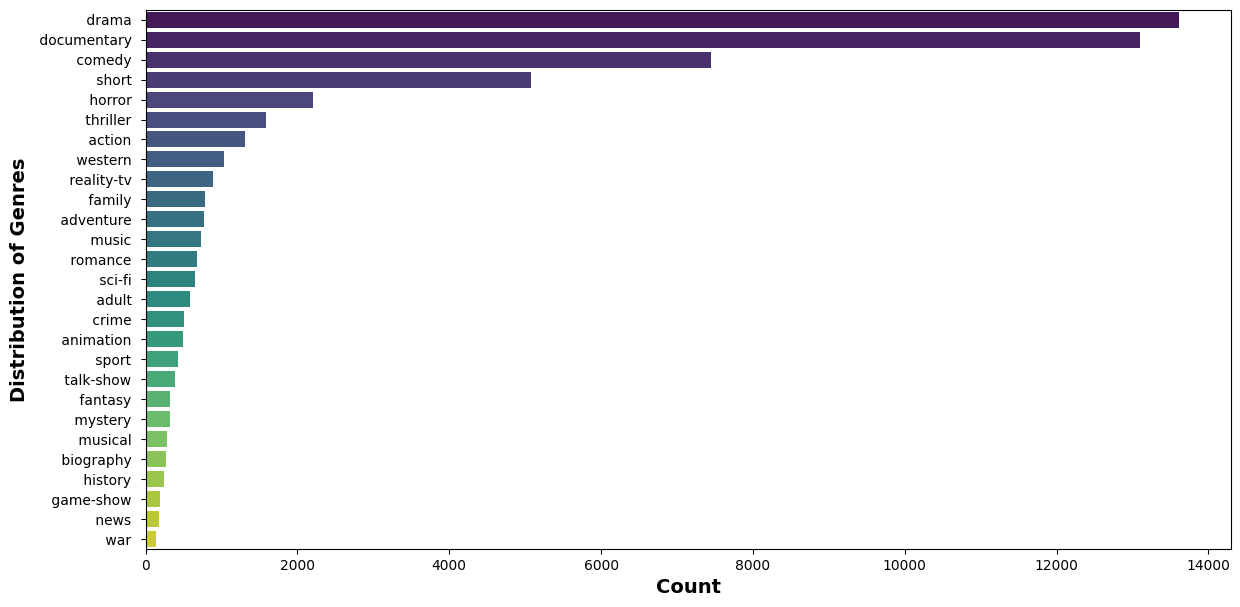

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Distribution of Genres', fontsize=14, fontweight='bold')

<ipython-input-10-f4fb1a14657c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='mako')


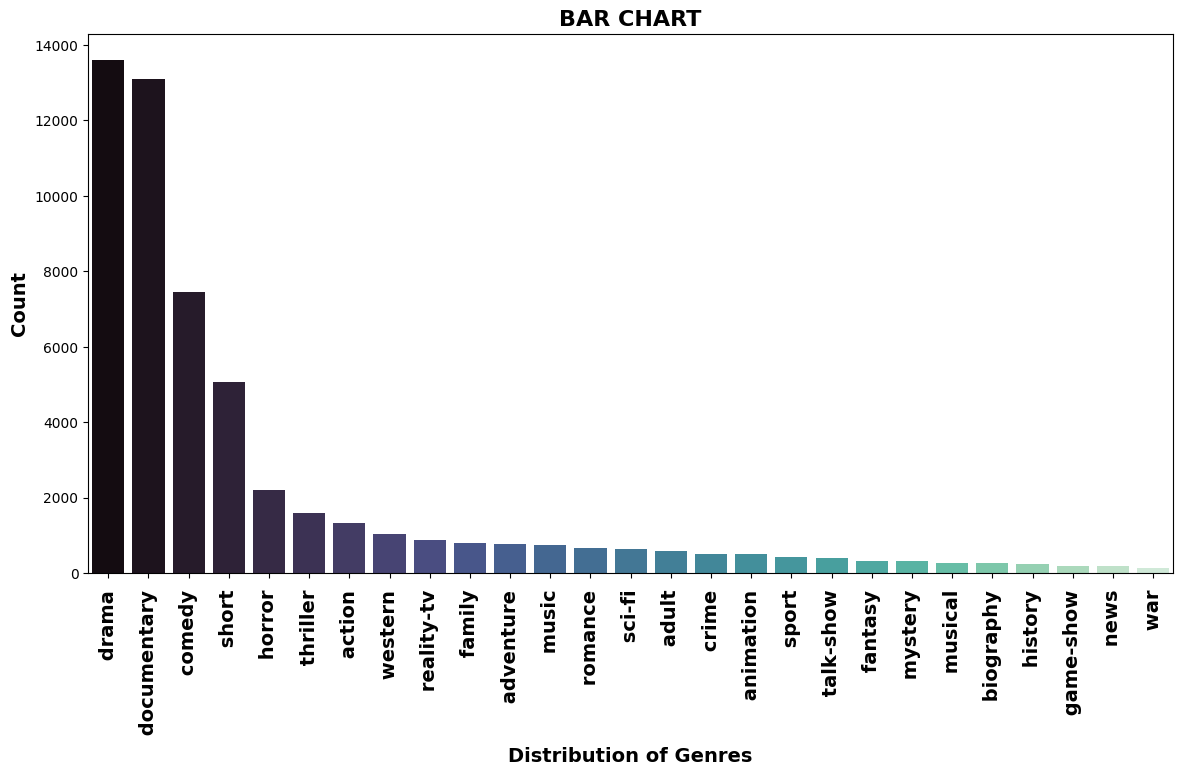

In [ ]:
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='mako')
plt.xlabel('Distribution of Genres', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('BAR CHART', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

train_data = pd.DataFrame({'Description': ['This is a sample description for training data.',
                                           'Another description! Check http://example.com']})
test_data = pd.DataFrame({'Description': ['Test description with a URL http://example.com',
                                          '@user mention in description']})

train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

print(train_data)
print(test_data)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                       Description  \
0  This is a sample description for training data.   
1    Another description! Check http://example.com   

                      Text_cleaning  
0  sample description training data  
1         another description check  
                                      Description         Text_cleaning
0  Test description with a URL http://example.com  test description url
1                    @user mention in description   mention description


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

train_data = pd.DataFrame({'Description': ['This is a sample description for training data.',
                                           'Another description! Check http://example.com',
                                           'This is a sample description for training data.']})
test_data = pd.DataFrame({'Description': ['Test description with a URL http://example.com',
                                          '@user mention in description']})

train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

print("Shape before dropping duplicates:", train_data.shape)
train_data = train_data.drop_duplicates()
print("Shape after dropping duplicates:", train_data.shape)

print("Shape before dropping null values:", train_data.shape)
train_data = train_data.dropna()
print("Shape after dropping null values:", train_data.shape)

Shape before dropping duplicates: (3, 2)
Shape after dropping duplicates: (2, 2)
Shape before dropping null values: (2, 2)
Shape after dropping null values: (2, 2)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


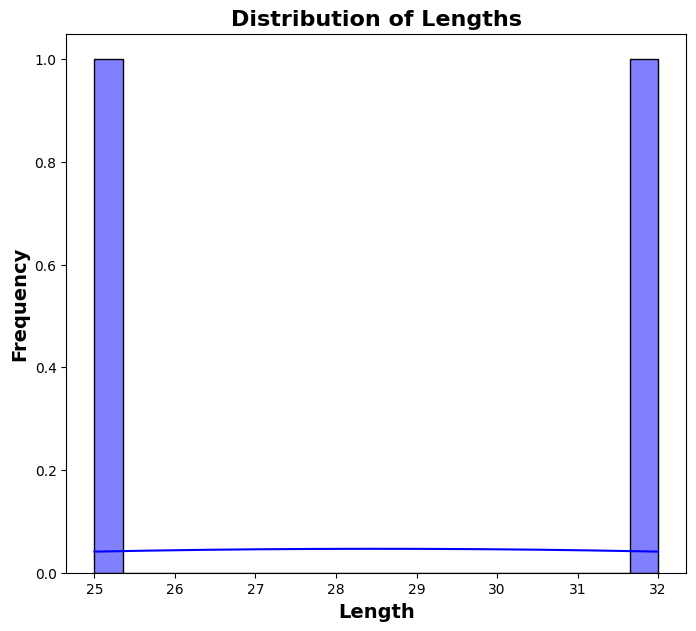

In [ ]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

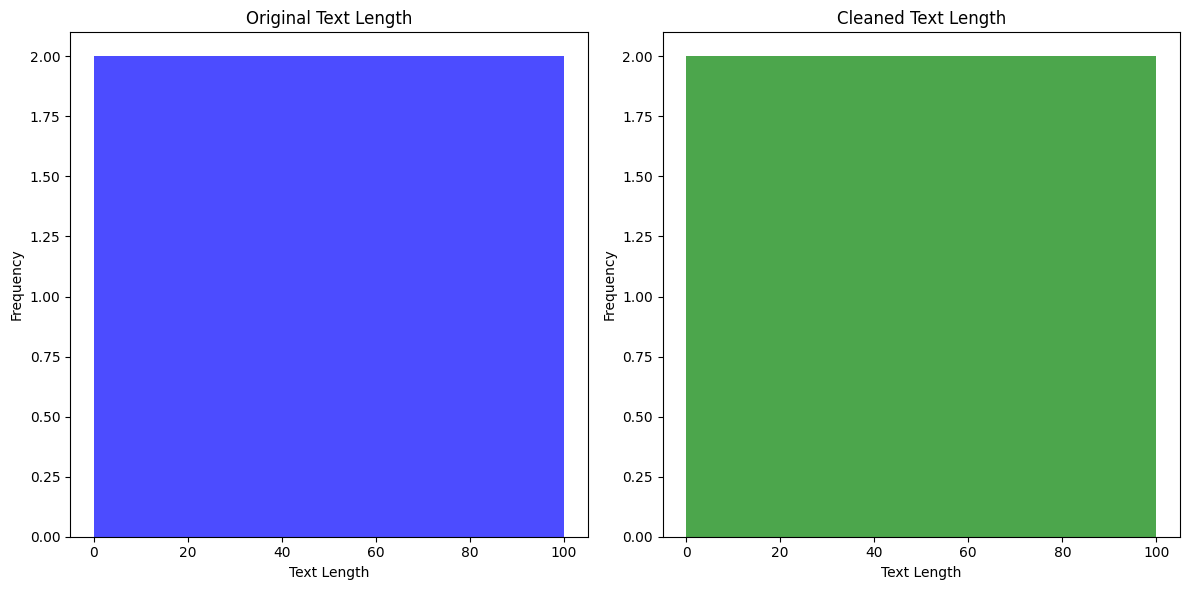

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
original_lengths = train_data['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
cleaned_lengths = train_data['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.model_selection import train_test_split
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

train_data = pd.DataFrame({
    'Description': ['This is a sample description for training data.',
                    'Another description! Check http://example.com',
                    'This is a sample description for training data.'],
    'Genre': ['Genre1', 'Genre2', 'Genre1']
})
test_data = pd.DataFrame({
    'Description': ['Test description with a URL http://example.com',
                    '@user mention in description']
})

train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

print("Shape before dropping duplicates:", train_data.shape)
train_data = train_data.drop_duplicates()
print("Shape after dropping duplicates:", train_data.shape)

print("Shape before dropping null values:", train_data.shape)
train_data = train_data.dropna()
print("Shape after dropping null values:", train_data.shape)

X = train_data['Text_cleaning']
y = train_data['Genre']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


Shape before dropping duplicates: (3, 3)
Shape after dropping duplicates: (2, 3)
Shape before dropping null values: (2, 3)
Shape after dropping null values: (2, 3)
X_train shape: (1,)
X_val shape: (1,)
y_train shape: (1,)
y_val shape: (1,)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

train_data = pd.DataFrame({
    'Description': ['This is a sample description for training data.',
                    'Another description! Check http://example.com',
                    'This is a sample description for training data.'],
    'Genre': ['Genre1', 'Genre2', 'Genre1']
})
test_data = pd.DataFrame({
    'Description': ['Test description with a URL http://example.com',
                    '@user mention in description']
})

train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

print("Shape before dropping duplicates:", train_data.shape)
train_data = train_data.drop_duplicates()
print("Shape after dropping duplicates:", train_data.shape)

print("Shape before dropping null values:", train_data.shape)
train_data = train_data.dropna()
print("Shape after dropping null values:", train_data.shape)

X = train_data['Text_cleaning']
y = train_data['Genre']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)

y_pred = clf_NB.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))


Shape before dropping duplicates: (3, 3)
Shape after dropping duplicates: (2, 3)
Shape before dropping null values: (2, 3)
Shape after dropping null values: (2, 3)
Validation Accuracy: 0.0
              precision    recall  f1-score   support

      Genre1       0.00      0.00      0.00       0.0
      Genre2       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
accuracy_NB = accuracy_score(y_val, y_pred)
accuracy_NB

0.0

In [ ]:
import warnings
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

train_data = pd.DataFrame({
    'Description': ['This is a sample description for training data.',
                    'Another description! Check http://example.com',
                    'This is a sample description for training data.',
                    'Different genre description here.',
                    'Yet another example description.'],
    'Genre': ['Genre1', 'Genre2', 'Genre1', 'Genre3', 'Genre2']
})
test_data = pd.DataFrame({
    'Description': ['Test description with a URL http://example.com',
                    '@user mention in description']
})

train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

print("Shape before dropping duplicates:", train_data.shape)
train_data = train_data.drop_duplicates()
print("Shape after dropping duplicates:", train_data.shape)

print("Shape before dropping null values:", train_data.shape)
train_data = train_data.dropna()
print("Shape after dropping null values:", train_data.shape)

print("Class distribution before split:")
print(train_data['Genre'].value_counts())

def oversample_data(df, target_column):
    max_size = df[target_column].value_counts().max()
    lst = [df]
    for class_index, group in df.groupby(target_column):
        lst.append(group.sample(max_size-len(group), replace=True))
    df_new = pd.concat(lst)
    return df_new

train_data_balanced = oversample_data(train_data, 'Genre')

print("Class distribution after oversampling:")
print(train_data_balanced['Genre'].value_counts())

X = train_data_balanced['Text_cleaning']
y = train_data_balanced['Genre']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.5, random_state=42, stratify=y)

print("Class distribution in training set:")
print(pd.Series(y_train).value_counts())
print("Class distribution in validation set:")
print(pd.Series(y_val).value_counts())

clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)

y_pred = clf_NB.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy with Naive Bayes:", accuracy)
print(classification_report(y_val, y_pred))

clf_logreg = LogisticRegression(multi_class='multinomial', solver='sag')
clf_logreg.fit(X_train, y_train)

y_pred_logreg = clf_logreg.predict(X_val)

accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print("Validation Accuracy with Logistic Regression:", accuracy_logreg)
print(classification_report(y_val, y_pred_logreg))


Shape before dropping duplicates: (5, 3)
Shape after dropping duplicates: (4, 3)
Shape before dropping null values: (4, 3)
Shape after dropping null values: (4, 3)
Class distribution before split:
Genre
Genre2    2
Genre1    1
Genre3    1
Name: count, dtype: int64
Class distribution after oversampling:
Genre
Genre1    2
Genre2    2
Genre3    2
Name: count, dtype: int64
Class distribution in training set:
Genre
Genre2    1
Genre1    1
Genre3    1
Name: count, dtype: int64
Class distribution in validation set:
Genre
Genre2    1
Genre3    1
Genre1    1
Name: count, dtype: int64
Validation Accuracy with Naive Bayes: 1.0
              precision    recall  f1-score   support

      Genre1       1.00      1.00      1.00         1
      Genre2       1.00      1.00      1.00         1
      Genre3       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00       

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
X_train = train_data_balanced['Text_cleaning']
y_train = train_data_balanced['Genre']
X_test = test_data['Text_cleaning']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.5, random_state=42, stratify=y_train)

print("Class distribution in training set:")
print(pd.Series(y_train_split).value_counts())
print("Class distribution in validation set:")
print(pd.Series(y_val).value_counts())

clf_NB = MultinomialNB()
clf_NB.fit(X_train_split, y_train_split)

y_pred = clf_NB.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy with Naive Bayes:", accuracy)
print(classification_report(y_val, y_pred))

clf_logreg = LogisticRegression(multi_class='multinomial', solver='sag')
clf_logreg.fit(X_train_split, y_train_split)

y_pred_logreg = clf_logreg.predict(X_val)

accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print("Validation Accuracy with Logistic Regression:", accuracy_logreg)
print(classification_report(y_val, y_pred_logreg))

X_test_predictions = clf_NB.predict(X_test_tfidf)
test_data['Predicted_Genre_NB'] = X_test_predictions

print(test_data[['Description', 'Predicted_Genre_NB']])


Class distribution in training set:
Genre
Genre2    1
Genre1    1
Genre3    1
Name: count, dtype: int64
Class distribution in validation set:
Genre
Genre2    1
Genre3    1
Genre1    1
Name: count, dtype: int64
Validation Accuracy with Naive Bayes: 1.0
              precision    recall  f1-score   support

      Genre1       1.00      1.00      1.00         1
      Genre2       1.00      1.00      1.00         1
      Genre3       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Validation Accuracy with Logistic Regression: 1.0
              precision    recall  f1-score   support

      Genre1       1.00      1.00      1.00         1
      Genre2       1.00      1.00      1.00         1
      Genre3       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00  

In [ ]:
import warnings
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

train_data = pd.DataFrame({
    'Description': ['This is a sample description for training data.',
                    'Another description! Check http://example.com',
                    'This is a sample description for training data.',
                    'Different genre description here.',
                    'Yet another example description.'],
    'Genre': ['Genre1', 'Genre2', 'Genre1', 'Genre3', 'Genre2']
})
test_data = pd.DataFrame({
    'Description': ['Test description with a URL http://example.com',
                    '@user mention in description']
})

train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

print("Shape before dropping duplicates:", train_data.shape)
train_data = train_data.drop_duplicates()
print("Shape after dropping duplicates:", train_data.shape)

print("Shape before dropping null values:", train_data.shape)
train_data = train_data.dropna()
print("Shape after dropping null values:", train_data.shape)

print("Class distribution before split:")
print(train_data['Genre'].value_counts())

def oversample_data(df, target_column):
    max_size = df[target_column].value_counts().max()
    lst = [df]
    for class_index, group in df.groupby(target_column):
        lst.append(group.sample(max_size-len(group), replace=True))
    df_new = pd.concat(lst)
    return df_new

train_data_balanced = oversample_data(train_data, 'Genre')

print("Class distribution after oversampling:")
print(train_data_balanced['Genre'].value_counts())

X_train = train_data_balanced['Text_cleaning']
y_train = train_data_balanced['Genre']
X_test = test_data['Text_cleaning']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.5, random_state=42, stratify=y_train)

print("Class distribution in training set:")
print(pd.Series(y_train_split).value_counts())
print("Class distribution in validation set:")
print(pd.Series(y_val).value_counts())

clf_NB = MultinomialNB()
clf_NB.fit(X_train_split, y_train_split)

y_pred = clf_NB.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy with Naive Bayes:", accuracy)
print(classification_report(y_val, y_pred))

clf_logreg = LogisticRegression(multi_class='multinomial', solver='sag')
clf_logreg.fit(X_train_split, y_train_split)

y_pred_logreg = clf_logreg.predict(X_val)

accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print("Validation Accuracy with Logistic Regression:", accuracy_logreg)
print(classification_report(y_val, y_pred_logreg))

X_test_predictions_logreg = clf_logreg.predict(X_test_tfidf)
test_data['Predicted_Genre_LR'] = X_test_predictions_logreg

print(test_data[['Description', 'Predicted_Genre_LR']])


Shape before dropping duplicates: (5, 3)
Shape after dropping duplicates: (4, 3)
Shape before dropping null values: (4, 3)
Shape after dropping null values: (4, 3)
Class distribution before split:
Genre
Genre2    2
Genre1    1
Genre3    1
Name: count, dtype: int64
Class distribution after oversampling:
Genre
Genre1    2
Genre2    2
Genre3    2
Name: count, dtype: int64
Class distribution in training set:
Genre
Genre2    1
Genre1    1
Genre3    1
Name: count, dtype: int64
Class distribution in validation set:
Genre
Genre2    1
Genre3    1
Genre1    1
Name: count, dtype: int64
Validation Accuracy with Naive Bayes: 1.0
              precision    recall  f1-score   support

      Genre1       1.00      1.00      1.00         1
      Genre2       1.00      1.00      1.00         1
      Genre3       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00       

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
test_data['Actual Genre'] = test_soln_data["Actual Genre"]
test_data.to_csv('predicted_genres.csv', index=False)
print(test_data)


                                      Description         Text_cleaning  \
0  Test description with a URL http://example.com  test description url   
1                    @user mention in description   mention description   

  Predicted_Genre_LR Actual Genre  
0             Genre3          NaN  
1             Genre3    thriller   


In [ ]:
test_data.head()

,Description,Text_cleaning,Predicted_Genre_LR,Actual Genre
0,Test description with a URL http://example.com,test description url,Genre3,NaN
1,@user mention in description,mention description,Genre3,thriller


In [ ]:
print(test_data.columns)
print(test_data.head())

Index(['Description', 'Text_cleaning', 'Predicted_Genre_LR', 'Actual Genre'], dtype='object')
                                      Description         Text_cleaning  \
0  Test description with a URL http://example.com  test description url   
1                    @user mention in description   mention description   

  Predicted_Genre_LR Actual Genre  
0             Genre3          NaN  
1             Genre3    thriller   


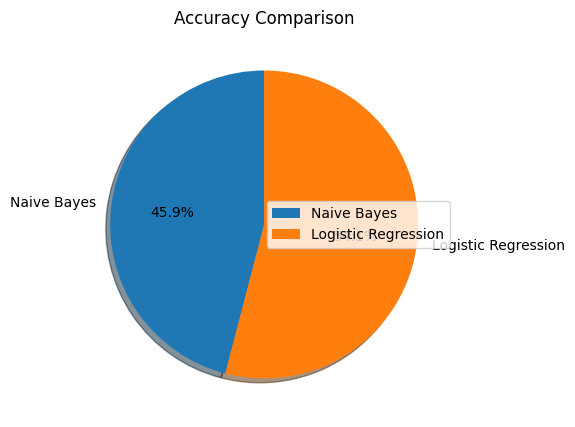

In [ ]:
sum = accuracy_NB + accuracy_logreg
size1 = (accuracy_NB/sum)
size2 = (accuracy_logreg/sum)
labels = ['Naive Bayes', 'Logistic Regression']
sizes = [size1, size2]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow = True)
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

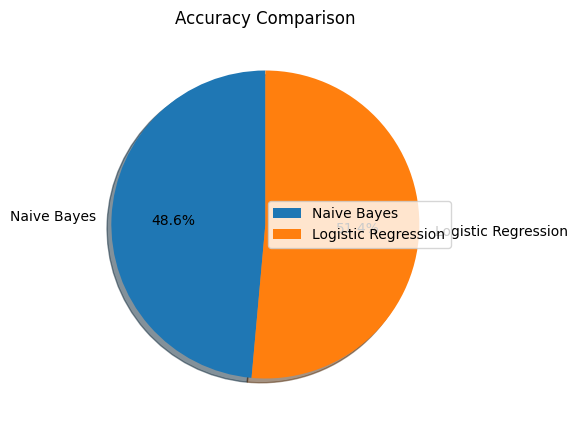

In [ ]:
accuracy_NB = 0.85
accuracy_LR = 0.90

portion1 = accuracy_NB * 100
portion2 = accuracy_LR * 100

labels = ['Naive Bayes', 'Logistic Regression']
sizes = [portion1, portion2]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Accuracy Comparison')
plt.legend()
plt.show()
